<a href="https://colab.research.google.com/github/IbrahimTGhanem/DiabetesPrediction/blob/main/Main_codebook_Toronto_CMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from itertools import product

In [ ]:
import pandas as pd
data = pd.read_csv("./Toronto CMA.csv")

# 1149 CMA
# 570 Only
print(data.columns)

Index(['spatial_id', 'Mental Health Score', 'Mental Health Binary',
       'Unemployment Rate', 'High Education Rate', 'Average Income',
       'Median Age', 'Recent Immigrant Rate', 'Rented Rate',
       'Visible Minority Rate', 'Visible Minority Binary', 'Work Stress Score',
       'Work Stress binary', 'Rate of Regular alcohol',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Total Population', 'Food Insecurity score',
       'Food Insecurity binary', 'Diabetes Type 2 rate', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability',
       'Material Deprivation', 'Ethnic Concentration',
       'Residential Instability quintiles', 'Material Deprivation quintiles',
       'Ethnic Concentration quintiles'],
      dtype='object')


In [ ]:
# Viewing the first few rows of the dataset
data.head()

,spatial_id,Mental Health Score,Mental Health Binary,Unemployment Rate,High Education Rate,Average Income,Median Age,Recent Immigrant Rate,Rented Rate,Visible Minority Rate,...,Diabetes Type 2 rate,Diabetes,Overweight,Obese,Residential Instability,Material Deprivation,Ethnic Concentration,Residential Instability quintiles,Material Deprivation quintiles,Ethnic Concentration quintiles
0,5350001.0,3.943070,0,7.5,57.9439,140470.9957,41.0,1.9640,33.0677,35.0245,...,6.5107,0,31.9850,21.0068,0.082319,-0.940159,-0.229802,3,1,2
1,5350002.0,3.772154,0,5.2,61.1722,149880.7211,58.3,0.3378,7.8358,0.0100,...,11.9783,1,41.2641,15.5695,0.161009,0.354992,-1.339000,3,4,1
2,5350003.0,3.804840,0,10.0,62.5397,103790.1244,44.6,23.6495,38.1295,20.3100,...,7.3599,0,41.3378,15.4334,2.388299,-1.523984,1.279890,5,1,4
3,5350004.0,3.473871,1,11.5,34.8887,68088.0300,38.2,6.5911,93.3799,52.3959,...,13.3462,1,29.3714,25.1835,2.373135,1.345854,0.804453,5,5,4
4,5350005.0,3.699146,1,8.5,46.4921,83009.5819,36.0,9.3404,71.3352,48.1815,...,8.4192,0,32.2253,22.2522,2.267341,0.527991,0.655762,5,4,4


In [ ]:
description = data.describe()
description

,spatial_id,Mental Health Score,Mental Health Binary,Unemployment Rate,High Education Rate,Average Income,Median Age,Recent Immigrant Rate,Rented Rate,Visible Minority Rate,...,Diabetes Type 2 rate,Diabetes,Overweight,Obese,Residential Instability,Material Deprivation,Ethnic Concentration,Residential Instability quintiles,Material Deprivation quintiles,Ethnic Concentration quintiles
count,1.149000e+03,1149.000000,1149.000000,1149.000000,1149.000000,1.149000e+03,1149.000000,1149.000000,1149.000000,1149.000000,...,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,5.350378e+06,3.708185,0.456919,8.882446,43.660143,1.404743e+05,41.131506,8.175071,30.716517,52.062515,...,7.341533,0.200174,31.421496,17.407454,0.089070,0.035727,0.850820,2.961706,3.134030,3.770235
std,1.928752e+02,0.180842,0.498357,2.988478,15.268003,8.693268e+04,5.289810,5.322161,22.775151,26.214372,...,3.776123,0.400305,6.047741,4.355703,0.966249,0.848042,0.801010,1.412462,1.355515,1.135943
min,5.350001e+06,3.044088,0.000000,0.010000,8.145900,4.506773e+04,28.200000,0.337800,0.010000,0.010000,...,0.000000,0.000000,13.242700,5.422700,-1.716538,-1.961844,-1.339000,1.000000,1.000000,1.000000
25%,5.350241e+06,3.590828,0.000000,7.100000,32.324900,9.830399e+04,37.400000,4.420000,11.640900,29.080100,...,4.415800,0.000000,27.972000,14.323800,-0.619886,-0.548663,0.187175,2.000000,2.000000,3.000000
50%,5.350400e+06,3.728502,0.000000,8.600000,41.694100,1.230081e+05,40.500000,6.909500,23.831600,52.253500,...,7.448100,0.000000,31.539000,17.385600,-0.023471,-0.119926,0.850800,3.000000,3.000000,4.000000
75%,5.350525e+06,3.838962,1.000000,10.400000,55.082500,1.510459e+05,44.300000,10.700400,46.742000,74.989800,...,9.984600,0.000000,34.952700,20.353100,0.615760,0.436542,1.456866,4.000000,4.000000,5.000000
max,5.350832e+06,4.114386,1.000000,37.900000,81.938000,1.127636e+06,84.900000,35.849100,100.000000,98.758200,...,23.839600,1.000000,51.869500,39.633600,3.398448,4.197645,3.158430,5.000000,5.000000,5.000000


In [ ]:
# Checking for missing values
print(data.isnull().sum())

spatial_id                           0
Mental Health Score                  0
Mental Health Binary                 0
Unemployment Rate                    0
High Education Rate                  0
Average Income                       0
Median Age                           0
Recent Immigrant Rate                0
Rented Rate                          0
Visible Minority Rate                0
Visible Minority Binary              0
Work Stress Score                    0
Work Stress binary                   0
Rate of Regular alcohol              0
Active transportation                0
Rate of Active population            0
Rate of Daily Smokers                0
Total Population                     0
Food Insecurity score                0
Food Insecurity binary               0
Diabetes Type 2 rate                 0
Diabetes                             0
Overweight                           0
Obese                                0
Residential Instability              0
Material Deprivation     

**1.2: Process of omitting irrelevant columns (ensuring high data quality)**

In [ ]:
identifiers_to_drop = ['spatial_id']
data = data.drop(columns=identifiers_to_drop)

In [ ]:
population = ['Total Population']
data = data.drop(columns=population)


**Section 2: Data Engineering Process**

In [ ]:
data['Diabetes Label'] = np.where(data['Diabetes'] == 1, 'High', 'Low')

In [ ]:
toronto_only_extreme = (data['Material Deprivation quintiles'] == 3) & (data['Residential Instability quintiles'] == 1)
cma_extreme = (data['Material Deprivation quintiles'] == 2) & (data['Residential Instability quintiles'] == 4)

data['Instability_Deprivation'] = toronto_only_extreme | cma_extreme
data['Instability_Deprivation'] = data['Instability_Deprivation'].astype(int)

In [ ]:
DataSimple = data.copy()

In [ ]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Rate of Regular alcohol', 'Active transportation',
       'Rate of Active population', 'Rate of Daily Smokers',
       'Food Insecurity score', 'Food Insecurity binary',
       'Diabetes Type 2 rate', 'Diabetes', 'Overweight', 'Obese',
       'Residential Instability', 'Material Deprivation',
       'Ethnic Concentration', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Diabetes Label', 'Instability_Deprivation'],
      dtype='object')

In [ ]:
not_binarized_continous = [
    'Food Insecurity score',
    'Visible Minority Rate',
    'Work Stress Score',
    'Mental Health Score',
    'Rate of Regular alcohol',
    'Rate of Daily Smokers',
    'Rate of Active population',
    'Active transportation',
    'High Education Rate',
    'Average Income',
    'Unemployment Rate',
    'Recent Immigrant Rate',
]

not_treatments = [
    'Obese',
    'Overweight',
    'Rented Rate',
    'Ethnic Concentration',
    # 'Ethnic Concentration quintiles',
    'Residential Instability',
    # 'Residential Instability quintiles',
    'Material Deprivation',
    # 'Material Deprivation quintiles',
    'Median Age',
]

In [ ]:
df = DataSimple

def make_binary(_df, column, is_upper_one):
  average_column = _df[column].mean()
  if is_upper_one:
    _df[f'{column} (Binary)'] = (_df[column] >= average_column).astype(int)
  else:
    _df[f'{column} (Binary)'] = (_df[column] < average_column).astype(int)
  return _df

df = make_binary(df, 'Mental Health Score', True)
df = make_binary(df, 'Rate of Regular alcohol', False)
df = make_binary(df, 'Rate of Daily Smokers', False)
df = make_binary(df, 'Food Insecurity score', False)
df = make_binary(df, 'Work Stress Score', False)
df = make_binary(df, 'Rate of Active population', True)
df = make_binary(df, 'Active transportation', True)
df = make_binary(df, 'Obese', False)
df = make_binary(df, 'Overweight', False)

df = make_binary(df, 'High Education Rate', True)
df = make_binary(df, 'Average Income', True)
df = make_binary(df, 'Unemployment Rate', False)
df = make_binary(df, 'Median Age', False)

In [ ]:
# my guess
df = make_binary(df, 'Visible Minority Rate', True)
df = make_binary(df, 'Recent Immigrant Rate', True)
df = make_binary(df, 'Rented Rate', True)
df = make_binary(df, 'Ethnic Concentration', True)
df = make_binary(df, 'Residential Instability', False)
df = make_binary(df, 'Material Deprivation', False)

In [ ]:
# treat_cov
bin_bin = [f'{column} (Binary)' for column in not_binarized_continous] + [f'{column} (Binary)' for column in not_treatments] + ['Diabetes']
bin_con = [f'{column} (Binary)' for column in not_binarized_continous] + [f'{column}' for column in not_treatments] + ['Diabetes']
con_bin = [f'{column}' for column in not_binarized_continous] + [f'{column} (Binary)' for column in not_treatments] + ['Diabetes']
con_con = [f'{column}' for column in not_binarized_continous] + [f'{column}' for column in not_treatments] + ['Diabetes']

bin_bin = df[bin_bin]
bin_bin.to_csv('bin_bin.csv')
bin_con = df[bin_con]
bin_con.to_csv('bin_con.csv')
con_bin = df[con_bin]
con_bin.to_csv('con_bin.csv')
con_con = df[con_con]
con_con.to_csv('con_con.csv')

In [ ]:
# drop current binary columns (done)
# add binary column for all continous (done)
# add binary column for covariates (done)
# create 4 seperate dataframes (done)
# get the result for Mental Health Score

In [ ]:
!pip install shap
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [ ]:
treatments = [
    'Food Insecurity score',
    'Visible Minority Rate',
    'Work Stress Score',

    'Mental Health Score',
    'Rate of Regular alcohol',
    'Rate of Daily Smokers',

    'Rate of Active population',
    'Active transportation',
    'High Education Rate',

    'Average Income',
    'Unemployment Rate',
    'Recent Immigrant Rate',
]

not_treatments = [
    'Obese',
    'Overweight',
    'Rented Rate',
    'Ethnic Concentration',
    'Residential Instability',
    'Material Deprivation',
    'Median Age',
]

In [ ]:
import pandas as pd

# bin_bin
# bin_con
# con_bin
# con_con

config_df = {
    "bin_bin": bin_bin,
    "bin_con": bin_con,
    "con_bin": con_bin,
    "con_con": con_con,
}

covariates_per_config = {
    "bin_bin": [f'{column} (Binary)' for column in not_binarized_continous] + [f'{column} (Binary)' for column in not_treatments],
    "bin_con": [f'{column} (Binary)' for column in not_binarized_continous] + [f'{column}' for column in not_treatments],
    "con_bin": [f'{column}' for column in not_binarized_continous] + [f'{column} (Binary)' for column in not_treatments],
    "con_con": [f'{column}' for column in not_binarized_continous] + [f'{column}' for column in not_treatments],
}

config = "bin_bin"
df = config_df[config]
# set variables
treatment = 'Mental Health Score (Binary)'
outcome = 'Diabetes'

covariates = covariates_per_config[config]
covariates.remove(treatment)

all_variables = [*covariates, outcome, treatment]
df = df.dropna(axis=0, subset=all_variables)

# split data into train and test sets
train, test = train_test_split(df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

In [ ]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

# set parameters for causal forest
causal_forest = CausalForestDML(criterion='het',
                                n_estimators=10000,
                                min_samples_leaf=10,
                                max_depth=None,
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(),
                                model_y=LassoCV(),
                                )

# fit train data to causal forest model
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set
print("const_marginal_ate: ", causal_forest.const_marginal_ate(X_test))
shap_values = causal_forest.shap_values(X)

const_marginal_ate:  -0.19329716026126653


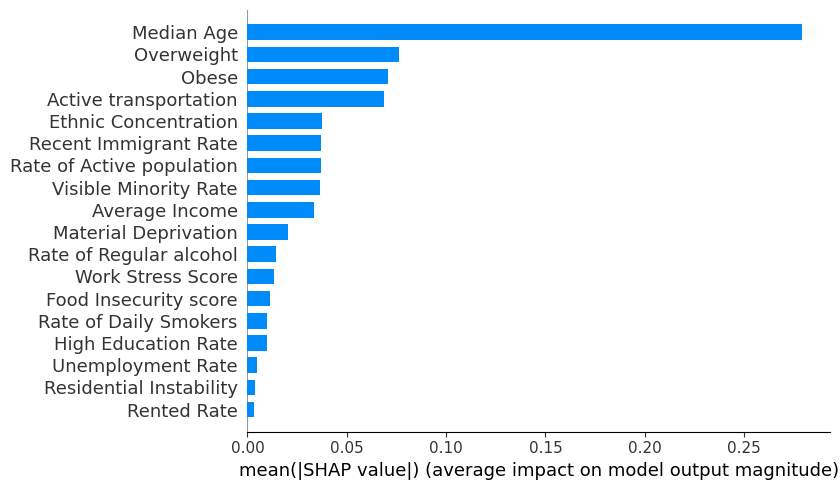

In [ ]:
import shap
# Suppose shap_values is the dictionary you provided
diabetes_shap_values = shap_values[outcome][treatment].values
base_values = shap_values[outcome][treatment].base_values
data = shap_values[outcome][treatment].data

feature_names = covariates

# beeswarm
shap.summary_plot(diabetes_shap_values, data, feature_names=feature_names)
shap.summary_plot(diabetes_shap_values, data, plot_type="bar", feature_names=feature_names, plot_size=[8.5,5])

In [ ]:
from tqdm import tqdm

outcome = 'Diabetes'

visual_namings = {
    'Mental Health Score': 'Mental Health Score',
    'log_median_age': 'Log Median Age',
    'Overweight':'Overweight',
    'Obese':'Obese',
    'Active transportation':'Active Transportation',
    'Rate of Active population':'Rate of Active Population',
    'Rate of Daily Smokers': 'Rate of Daily Smokers',
    'Visible Minority Rate': 'Visible Minority Rate',
    'Work Stress Score': 'Work Stress Score',
}

total_features = [
    'Active transportation',
    'Rate of Active population',
    'Rate of Daily Smokers',
    'Visible Minority Rate',
    'Work Stress Score',
    'Mental Health Score',
    'log_median_age',
    'Overweight',
    'Obese',
]

for treatment in tqdm(total_features):
  _covariates = [feature for feature in total_features if feature != treatment]
  _feature_names = [visual_namings[feature] for feature in _covariates]
  export_shap(treatment, outcome, _covariates, _feature_names) # efs stands for extended feature set

 36%|=======             | 334/919 [03:22<05:53]       

In [ ]:
import shap
import pandas as pd
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

def export_shap(
    treatment,
    outcome,
    covariates,
    feature_names,
):
  # read Stata .dta file
  df = DataSimple.copy()
  all_variables = [*covariates, outcome, treatment]
  df = df.dropna(axis=0, subset=all_variables)

  # split data into train and test sets
  train, test = train_test_split(df, test_size=0.2)

  # set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers
  Y = train[outcome]
  T = train[treatment]
  X = train[covariates]
  W = None
  X_test = test[covariates]

  # set parameters for causal forest
  causal_forest = CausalForestDML(criterion='het',
                                  n_estimators=10000,
                                  min_samples_leaf=10,
                                  max_depth=None,
                                  max_samples=0.5,
                                  discrete_treatment=False,
                                  honest=True,
                                  inference=True,
                                  cv=10,
                                  model_t=LassoCV(),
                                  model_y=LassoCV(),
                                  )

  # fit train data to causal forest model
  causal_forest.fit(Y, T, X=X, W=W)
  # estimate the CATE with the test set
  causal_forest.const_marginal_ate(X_test)

  shap_values = causal_forest.shap_values(X)
  # Suppose shap_values is the dictionary you provided
  diabetes_shap_values = shap_values[outcome][treatment].values
  base_values = shap_values[outcome][treatment].base_values
  data = shap_values[outcome][treatment].data
  shap_diagram_value = [np.mean(np.abs(diabetes_shap_values[:,i])) for i in range(len(covariates))]
  shap_df = pd.DataFrame({
      'Feature': feature_names,
      'Average SHAP Value': shap_diagram_value
  })

  # Export the DataFrame to a CSV file
  shap_df.to_csv(f'{visual_namings[treatment]}_efs.csv', index=False)

In [ ]:
# SVM pack
from tqdm import tqdm

outcome = 'Diabetes'

visual_namings = {
    'log_median_age': 'Log Median Age',
    'Overweight':'Overweight',
    'Obese':'Obese',
    'Active transportation':'Active Transportation',
    'Rate of Active population':'Rate of Active Population',
}

total_features = [
    'log_median_age',
    'Overweight',
    'Obese',
    'Active transportation',
    'Rate of Active population',
]

for treatment in tqdm(total_features):
  _covariates = [feature for feature in total_features if feature != treatment]
  _feature_names = [visual_namings[feature] for feature in _covariates]
  export_shap(treatment, outcome, _covariates, _feature_names, "svm")

In [ ]:
# SVM pack
from tqdm import tqdm

outcome = 'Diabetes'

visual_namings = {
    'log_median_age': 'Log Median Age',
    'Overweight':'Overweight',
    'Obese':'Obese',
    'Active transportation':'Active Transportation',
    'Rate of Active population':'Rate of Active Population',
}

total_features = [
    'log_median_age',
    'Overweight',
    'Obese',
    'Active transportation',
    'Rate of Active population',
]

for treatment in tqdm(total_features):
  _covariates = [feature for feature in total_features if feature != treatment]
  _feature_names = [visual_namings[feature] for feature in _covariates]
  export_shap(treatment, outcome, _covariates, _feature_names, "svm")

In [ ]:
# select each treatment from treatment set, consider the rest plus the non-treat set as covariates
# CATE + mean shap + beeswarm shap
# mean shap both jpg high quality + export variables to R for further investigation
# beeswarm only high quality jpg

In [ ]:
from tqdm import tqdm

treatments = [
    'Food Insecurity score',
    'Visible Minority Rate',
    'Work Stress Score',

    'Mental Health Score',
    'Rate of Regular alcohol',
    'Rate of Daily Smokers',

    'Rate of Active population',
    'Active transportation',
    'High Education Rate',

    'Average Income',
    'Unemployment Rate',
    'Recent Immigrant Rate',
]

not_treatments = [
    'Obese',
    'Overweight',
    'Rented Rate',
    'Ethnic Concentration',
    'Residential Instability',
    'Material Deprivation',
    'Median Age',
]

visual_namings = {key: key for key in treatments + not_treatments}
outcome = 'Diabetes'
CATES = []

counter = 0
for treatment in tqdm(treatments):
  _covariates = treatments + not_treatments
  _covariates.remove(treatment)
  _feature_names = [visual_namings[feature] for feature in _covariates]
  export_shap(treatment, outcome, _covariates, _feature_names)

for i in range(len(CATES)):
  print(f'CATE for {treatments[i]}: ', CATES[i])

100%|██████████| 12/12 [2:15:52<00:00, 679.38s/it]

CATE for Food Insecurity score:  -0.03944979490148659
CATE for Visible Minority Rate:  -0.0036481805370286976
CATE for Work Stress Score:  0.3119352790596249
CATE for Mental Health Score:  -1.044907921347569
CATE for Rate of Regular alcohol:  -0.005365988312185882
CATE for Rate of Daily Smokers:  0.003084858449828236
CATE for Rate of Active population:  -0.017376252628469813
CATE for Active transportation:  -0.013925171671434977
CATE for High Education Rate:  0.001480412934385532
CATE for Average Income:  3.1060676307347694e-07
CATE for Unemployment Rate:  -0.0007585737019558818
CATE for Recent Immigrant Rate:  -0.007943880464684874


In [ ]:
import shap
import pandas as pd
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

# read Stata .dta file
df = DataSimple.copy()
# split data into train and test sets
train, test = train_test_split(df, test_size=0.2)

def export_shap(
    treatment,
    outcome,
    covariates,
    feature_names
):

  # set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers
  Y = train[outcome]
  T = train[treatment]
  X = train[covariates]
  W = None
  X_test = test[covariates]

  # set parameters for causal forest
  causal_forest = CausalForestDML(criterion='het',
                                  n_estimators=10000,
                                  min_samples_leaf=10,
                                  max_depth=None,
                                  max_samples=0.5,
                                  discrete_treatment=False,
                                  honest=True,
                                  inference=True,
                                  cv=10,
                                  model_t=LassoCV(),
                                  model_y=LassoCV(),
                                  )

  # fit train data to causal forest model
  causal_forest.fit(Y, T, X=X, W=W)
  # estimate the CATE with the test set
  CATES.append(causal_forest.const_marginal_ate(X_test))

  shap_values = causal_forest.shap_values(X)
  # Suppose shap_values is the dictionary you provided
  diabetes_shap_values = shap_values[outcome][treatment].values
  base_values = shap_values[outcome][treatment].base_values
  data = shap_values[outcome][treatment].data
  shap_diagram_value = [np.mean(np.abs(diabetes_shap_values[:,i])) for i in range(len(covariates))]
  shap_df = pd.DataFrame({
      'Feature': feature_names,
      'Average SHAP Value': shap_diagram_value
  })

  # Export the DataFrame to a CSV file
  shap_df.to_csv(f'treatment {visual_namings[treatment]}.csv', index=False)
  # beeswarm
  shap.summary_plot(diabetes_shap_values, data, feature_names=feature_names, show=False)
  plt.savefig(f'beeswarm {treatment}.png', dpi=1200)
  plt.close()
  plt.figure()
  shap.summary_plot(diabetes_shap_values, data, plot_type="bar", feature_names=feature_names, plot_size=[8.5,5], show=False)
  plt.savefig(f'mean shap {treatment}.png', dpi=1200)
  plt.close()

